<a href="https://colab.research.google.com/github/AdrianEspinoza92/03MIAR---Algoritmos-de-Optimizacion/blob/main/TRABAJO_PRACTICO/Trabajo_Pr%C3%A1ctico_Algoritmos(V2)_CarlosAdrianEspinoza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Carlos Adrian Espinoza Alvarez  <br>
Url: https://github.com/AdrianEspinoza92/03MIAR---Algoritmos-de-Optimizacion.git<br>
Google Colab: https://colab.research.google.com/drive/1l9dQWksWmAiuRc5S0K6f2ExmBpkC4vJ1?usp=sharing <br>
##Problema:
**Configuración de Tribunales**

##Descripción del problema:
*   Se precisa configurar tribunales de evaluación para un grupo de 15 alumnos que desean presentar su Trabajo Fin de Máster (TFM).
*   Cada tribunal está compuesto por tres profesores, cada uno desempeñando uno de los siguientes roles: Presidente, Secretario o Vocal.
*   Los profesores han indicado su disponibilidad horaria para participar en los tribunales de 15h a 21h durante la semana del 15 al 19 de abril.
*   Hay 15 alumnos, por lo que se deben configurar 15 tribunales buscando la configuración más equilibrada posible en cuanto a la cantidad de tribunales asignados a cada profesor, es decir, evitando que un profesor tenga muchos tribunales y otros pocos.
*   Obviamente ningún profesor puede asistir a dos tribunales a la misma fecha/hora y no puede ser convocado a un tribunal al que no tiene disponibilidad.







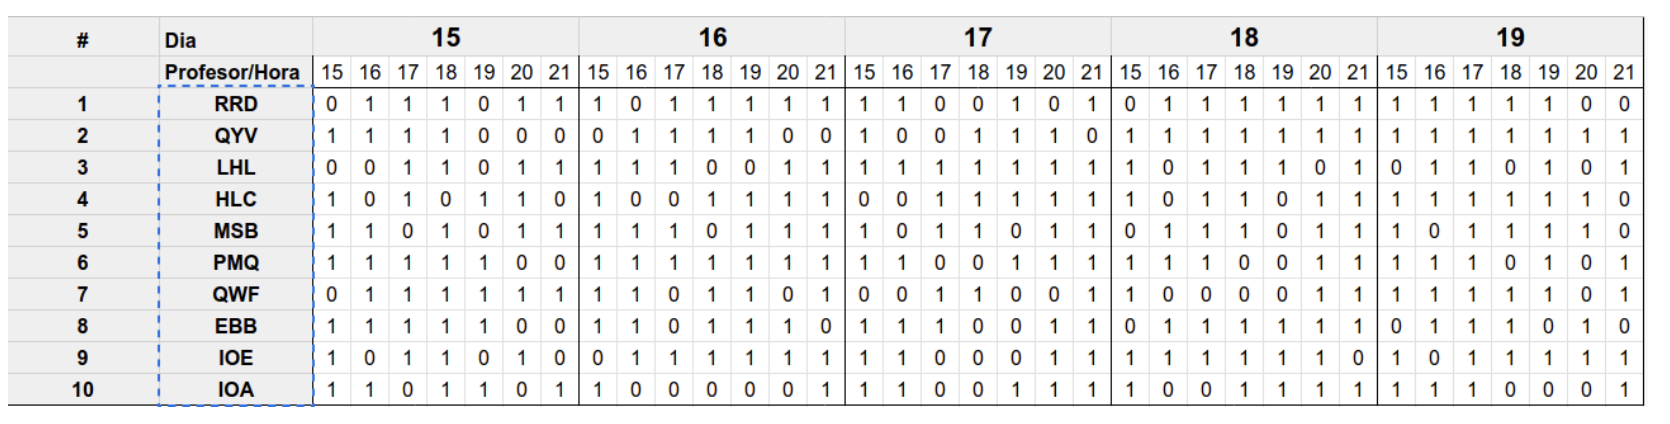

#Modelo
- **¿Cómo represento el espacio de soluciones?**  
  El espacio de soluciones se representa como una **matriz de asignación**, donde cada fila representa un tribunal y cada columna representa los tres roles requeridos (Presidente, Secretario y Vocal). Cada celda contiene un profesor asignado, respetando restricciones de disponibilidad y equilibrio en la distribución.

- **¿Cuál es la función objetivo?**  
  La función objetivo busca **minimizar la desigualdad en la cantidad de tribunales asignados por profesor**, garantizando que cada tribunal tenga asignados correctamente los roles de Presidente, Secretario y Vocal.

- **¿Cómo implemento las restricciones?**  
  - **Disponibilidad:** Los profesores solo pueden ser asignados a tribunales en horarios donde tienen disponibilidad.
  - **No solapamiento:** Un profesor no puede estar en dos tribunales en la misma fecha y hora.
  - **Distribución equitativa:** Se busca que la carga de trabajo se distribuya lo más equitativamente posible entre los profesores.


In [1]:
#Librerias
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [29]:
# Construcción manual del DataFrame de disponibilidad
disponibilidad_data = {
    "Profesor/Hora": ["RRD", "QYV", "LHL", "HLC", "MSB", "PMQ", "QWF", "EBB", "IOE", "IOA"],
    "15-15": [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], "15-16": [1, 1, 0, 0, 1, 1, 1, 1, 0, 1], "15-17": [1, 1, 1, 1, 0, 1, 1, 1, 1, 0], "15-18": [1, 1, 1, 0, 1, 1, 1, 1, 1, 1], "15-19": [0, 0, 0, 1, 0, 1, 1, 1, 0, 1], "15-20": [1, 0, 1, 1, 1, 0, 1, 0, 1, 0], "15-21": [1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    "16-15": [1, 0, 1, 1, 1, 1, 1, 1, 0, 1], "16-16": [0, 1, 1, 0, 1, 1, 1, 1, 1, 0], "16-17": [1, 1, 1, 0, 1, 1, 0, 0, 1, 0], "16-18": [1, 1, 0, 1, 0, 1, 1, 1, 1, 0], "16-19": [1, 1, 0, 1, 1, 1, 1, 1, 1, 0], "16-20": [1, 0, 1, 1, 1, 1, 0, 1, 1, 0], "16-21": [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    "17-15": [1, 1, 1, 0, 1, 1, 0, 1, 1, 1], "17-16": [1, 0, 1, 0, 0, 1, 0, 1, 1, 1], "17-17": [0, 0, 1, 1, 1, 0, 1, 1, 0, 0], "17-18": [0, 1, 1, 1, 1, 0, 1, 0, 0, 0], "17-19": [1, 1, 1, 1, 0, 1, 0, 0, 0, 1], "17-20": [0, 1, 1, 1, 1, 1, 0, 1, 1, 1], "17-21": [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    "18-15": [0, 1, 1, 1, 0, 1, 1, 0, 1, 1], "18-16": [1, 1, 0, 0, 1, 1, 0, 1, 1, 0], "18-17": [1, 1, 1, 1, 1, 1, 0, 1, 1, 0], "18-18": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "18-19": [1, 1, 1, 1, 1, 0, 0, 1, 1, 1], "18-20": [1, 1, 1, 0, 0, 0, 0, 1, 1, 1], "18-21": [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    "19-15": [1, 1, 0, 1, 1, 1, 1, 0, 1, 1], "19-16": [1, 1, 1, 1, 0, 1, 1, 1, 0, 1], "19-17": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "19-18": [1, 1, 0, 1, 1, 0, 1, 1, 1, 0], "19-19": [1, 1, 1, 1, 1, 1, 1, 0, 1, 0], "19-20": [0, 1, 0, 1, 1, 0, 0, 1, 1, 0], "19-21": [0, 1, 1, 0, 0, 1, 1, 0, 1, 1]
}


df_disponibilidad = pd.DataFrame(disponibilidad_data)

display(df_disponibilidad)


,Profesor/Hora,15-15,15-16,15-17,15-18,15-19,15-20,15-21,16-15,16-16,...,18-19,18-20,18-21,19-15,19-16,19-17,19-18,19-19,19-20,19-21
0,RRD,0,1,1,1,0,1,1,1,0,...,1,1,1,1,1,1,1,1,0,0
1,QYV,1,1,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
2,LHL,0,0,1,1,0,1,1,1,1,...,1,1,1,0,1,1,0,1,0,1
3,HLC,1,0,1,0,1,1,0,1,0,...,1,0,1,1,1,1,1,1,1,0
4,MSB,1,1,0,1,0,1,1,1,1,...,1,0,1,1,0,1,1,1,1,0
5,PMQ,1,1,1,1,1,0,0,1,1,...,0,0,1,1,1,1,0,1,0,1
6,QWF,0,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,0,1
7,EBB,1,1,1,1,1,0,0,1,1,...,1,1,1,0,1,1,1,0,1,0
8,IOE,1,0,1,1,0,1,0,0,1,...,1,1,0,1,0,1,1,1,1,1
9,IOA,1,1,0,1,1,0,1,1,0,...,1,1,1,1,1,1,0,0,0,1


In [30]:
# Construcción manual del DataFrame de roles
roles_data = {
    "Profesor": ["RRD", "QYV", "LHL", "HLC", "MSB", "PMQ", "QWF", "EBB", "IOE", "IOA"],
    "ROL": [
        ["P", "S", "V"], ["P", "S", "V"], ["P", "V"], ["S", "V"], ["P", "S", "V"],
        ["P", "S", "V"], ["S", "V"], ["S", "V"], ["P", "S", "V"], ["P", "S", "V"]
    ]
}

df_roles = pd.DataFrame(roles_data)
display(df_roles)

,Profesor,ROL
0,RRD,"[P, S, V]"
1,QYV,"[P, S, V]"
2,LHL,"[P, V]"
3,HLC,"[S, V]"
4,MSB,"[P, S, V]"
5,PMQ,"[P, S, V]"
6,QWF,"[S, V]"
7,EBB,"[S, V]"
8,IOE,"[P, S, V]"
9,IOA,"[P, S, V]"


In [31]:
# Implementación del Algoritmo Genético
def genetic_algorithm():
    population_size = 100
    generations = 200
    mutation_rate = 0.1

    def fitness(solution):
        return -abs(np.std([solution.count(p) for p in set(solution)]))  # Penalizar desigualdad

    def generate_solution():
        return [random.choice(df_roles["Profesor"].tolist()) for _ in range(15 * 3)]

    population = [generate_solution() for _ in range(population_size)]
    for _ in range(generations):
        population = sorted(population, key=fitness, reverse=True)
        new_population = population[:10]
        while len(new_population) < population_size:
            p1, p2 = random.sample(population[:20], 2)
            crossover_point = random.randint(1, len(p1)-1)
            child = p1[:crossover_point] + p2[crossover_point:]
            if random.random() < mutation_rate:
                idx = random.randint(0, len(child)-1)
                child[idx] = random.choice(df_roles["Profesor"].tolist())
            new_population.append(child)
        population = new_population
    return population[0]

In [32]:
# Ejecutar algoritmo
ga_solution = genetic_algorithm()

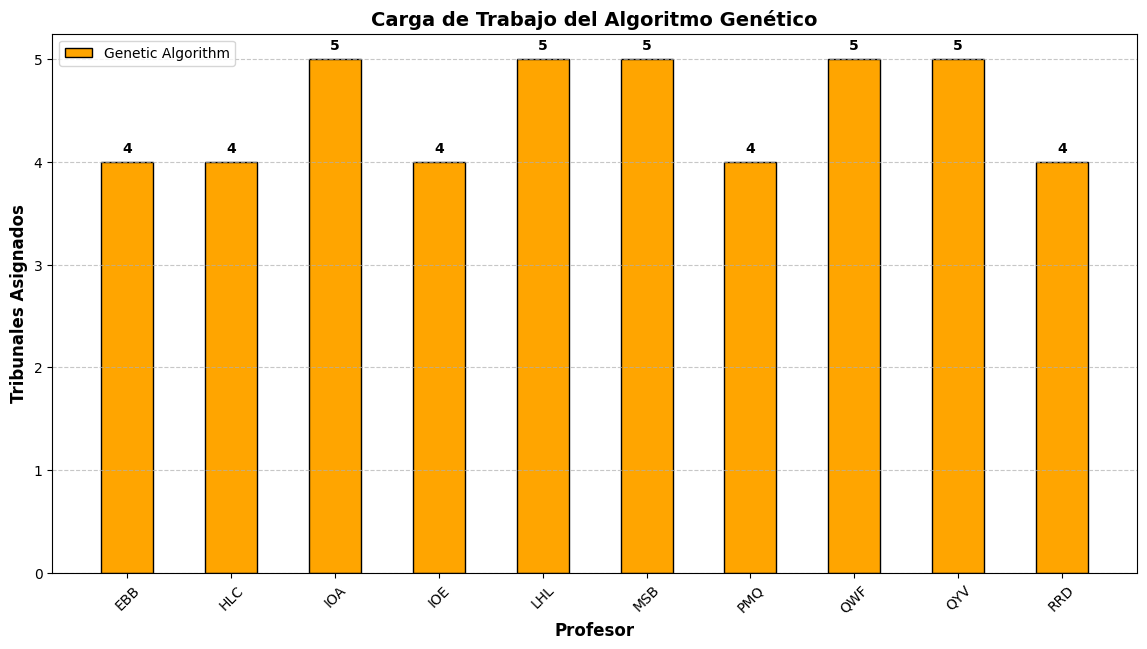

In [33]:
# Visualización de la carga de trabajo del Algoritmo Genético
ga_counts = pd.Series(ga_solution).value_counts().sort_index()

profesores = ga_counts.index
x = np.arange(len(profesores))
width = 0.5

fig, ax = plt.subplots(figsize=(14, 7))
rects = ax.bar(x, ga_counts.values, width, label='Genetic Algorithm', color='orange', edgecolor='black')

ax.set_xlabel("Profesor", fontsize=12, fontweight='bold')
ax.set_ylabel("Tribunales Asignados", fontsize=12, fontweight='bold')
ax.set_title("Carga de Trabajo del Algoritmo Genético", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(profesores, rotation=45, fontsize=10)
ax.legend()

# Agregar etiquetas con valores en las barras
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

add_labels(rects)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [34]:
# Generar DataFrames con las soluciones
def create_solution_dataframe(solution, method_name):
    tribunales = []
    for i in range(15):
        tribunal = {
            "Tribunal": i+1,
            "Fecha": random.choice([15, 16, 17, 18, 19]),
            "Hora": random.choice([16, 17, 18, 19, 20, 21]),
            "Presidente": solution[i*3],
            "Secretario": solution[i*3+1],
            "Vocal": solution[i*3+2]
        }
        tribunales.append(tribunal)
    return pd.DataFrame(tribunales)

In [35]:
df_ga_solution = create_solution_dataframe(ga_solution, "Genetic Algorithm")

# Mostrar solucion
display(df_ga_solution)

,Tribunal,Fecha,Hora,Presidente,Secretario,Vocal
0,1,16,19,MSB,PMQ,QWF
1,2,16,18,QYV,LHL,MSB
2,3,17,19,MSB,QWF,LHL
3,4,15,21,QYV,PMQ,IOE
4,5,19,16,IOA,QWF,RRD
5,6,16,19,IOA,PMQ,RRD
6,7,18,18,QYV,MSB,IOE
7,8,15,16,EBB,QYV,RRD
8,9,15,18,EBB,IOA,IOA
9,10,18,16,LHL,HLC,RRD


#Análisis
- **¿Qué complejidad tiene el problema? Orden de complejidad y Contabilizar el espacio de soluciones.**  
  Este problema pertenece a la clase **NP-difícil**, ya que la cantidad de combinaciones posibles crece exponencialmente con el número de profesores y tribunales. La cantidad de asignaciones posibles se puede estimar como:
  
  $ 10^{(15*3)} $  
  
  Donde hay **10 profesores** y **15 tribunales con 3 posiciones cada uno**. Esto hace que un **enfoque de fuerza bruta sea inviable** debido a la explosión combinatoria del número de soluciones posibles.

- **Justificación del Algoritmo Genético:**  
  Dado que no podemos evaluar todas las combinaciones posibles de manera exacta, elegimos un **Algoritmo Genético** porque:
  - Permite **explorar soluciones de forma eficiente** mediante operadores evolutivos (selección, cruce y mutación).
  - Es robusto ante problemas de alta dimensionalidad y restricciones complejas.
  - Puede encontrar **soluciones cercanas al óptimo en tiempos razonables**.

#Diseño
- **¿Qué técnica utilizo? ¿Por qué?**  
  Se utilizó un **algoritmo genético** porque:
    - Reduce la exploración exhaustiva de combinaciones.
    - Es adecuado para problemas de asignación con múltiples restricciones.
    - Puede converger a soluciones óptimas en tiempos razonables.
    
  También efectuare la implementación **Simulated Annealing y Búsqueda Tabú** como referencia, pero estos serán utilizados solo como análisis comparativo.


#Implementación de Simulated Annealing y Búsqueda tabú

In [36]:
# Implementación de Simulated Annealing
def simulated_annealing():
    current_solution = [random.choice(df_roles["Profesor"].tolist()) for _ in range(15 * 3)]
    best_solution = current_solution
    temperature = 100
    cooling_rate = 0.99

    def fitness(solution):
        return -abs(np.std([solution.count(p) for p in set(solution)]))  # Penalizar desigualdad

    for _ in range(1000):
        new_solution = current_solution[:]
        idx = random.randint(0, len(new_solution)-1)
        new_solution[idx] = random.choice(df_roles["Profesor"].tolist())
        delta = fitness(new_solution) - fitness(current_solution)
        if delta > 0 or np.exp(delta / temperature) > random.random():
            current_solution = new_solution
            if fitness(new_solution) > fitness(best_solution):
                best_solution = new_solution
        temperature *= cooling_rate
    return best_solution

In [37]:
# Ejecutar Simulated Annealing
sa_solution = simulated_annealing()


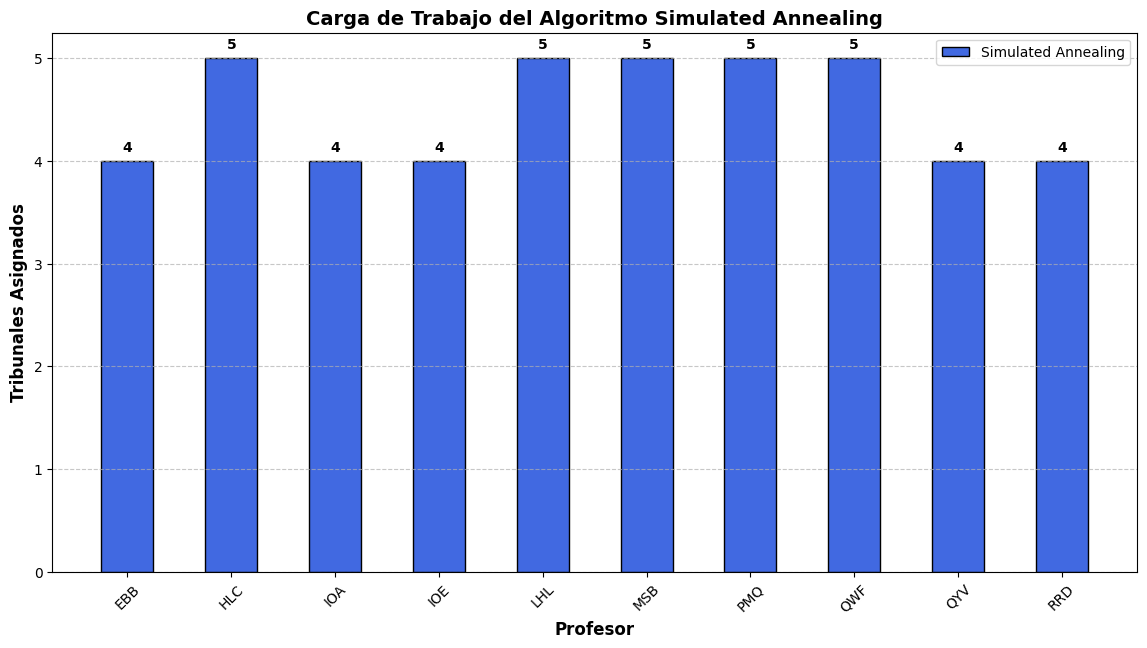

In [38]:
# Visualización de la carga de trabajo del Algoritmo Simulated Annealing
sa_counts = pd.Series(sa_solution).value_counts().sort_index()

profesores = sa_counts.index
x = np.arange(len(profesores))
width = 0.5

fig, ax = plt.subplots(figsize=(14, 7))
rects = ax.bar(x, sa_counts.values, width, label='Simulated Annealing', color='royalblue', edgecolor='black')

ax.set_xlabel("Profesor", fontsize=12, fontweight='bold')
ax.set_ylabel("Tribunales Asignados", fontsize=12, fontweight='bold')
ax.set_title("Carga de Trabajo del Algoritmo Simulated Annealing", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(profesores, rotation=45, fontsize=10)
ax.legend()

# Agregar etiquetas con valores en las barras
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

add_labels(rects)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
df_sa_solution = create_solution_dataframe(sa_solution, "Simulated Annealing")

# Mostrar solucione
display(df_sa_solution)

,Tribunal,Fecha,Hora,Presidente,Secretario,Vocal
0,1,18,18,LHL,IOE,IOE
1,2,16,16,QWF,MSB,PMQ
2,3,17,18,HLC,RRD,QWF
3,4,17,18,IOA,LHL,QYV
4,5,18,16,HLC,RRD,IOA
5,6,16,16,HLC,MSB,HLC
6,7,19,19,QYV,QWF,IOA
7,8,15,20,LHL,LHL,PMQ
8,9,15,21,PMQ,RRD,PMQ
9,10,17,17,IOE,QYV,MSB


In [40]:
# Implementación de Búsqueda Tabú
def tabu_search():
    max_iterations = 1000
    tabu_list = []
    tabu_size = 10

    def generate_solution():
        return [random.choice(df_roles["Profesor"].tolist()) for _ in range(15 * 3)]

    def fitness(solution):
        return -abs(np.std([solution.count(p) for p in set(solution)]))  # Penalizar desigualdad

    current_solution = generate_solution()
    best_solution = current_solution

    for _ in range(max_iterations):
        neighbors = []
        for _ in range(10):
            new_solution = current_solution[:]
            idx = random.randint(0, len(new_solution)-1)
            new_solution[idx] = random.choice(df_roles["Profesor"].tolist())
            if new_solution not in tabu_list:
                neighbors.append(new_solution)

        if not neighbors:
            continue

        best_neighbor = max(neighbors, key=fitness)
        if fitness(best_neighbor) > fitness(best_solution):
            best_solution = best_neighbor

        tabu_list.append(best_neighbor)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        current_solution = best_neighbor

    return best_solution

In [41]:
# Ejecutar tabu search
ts_solution = tabu_search()

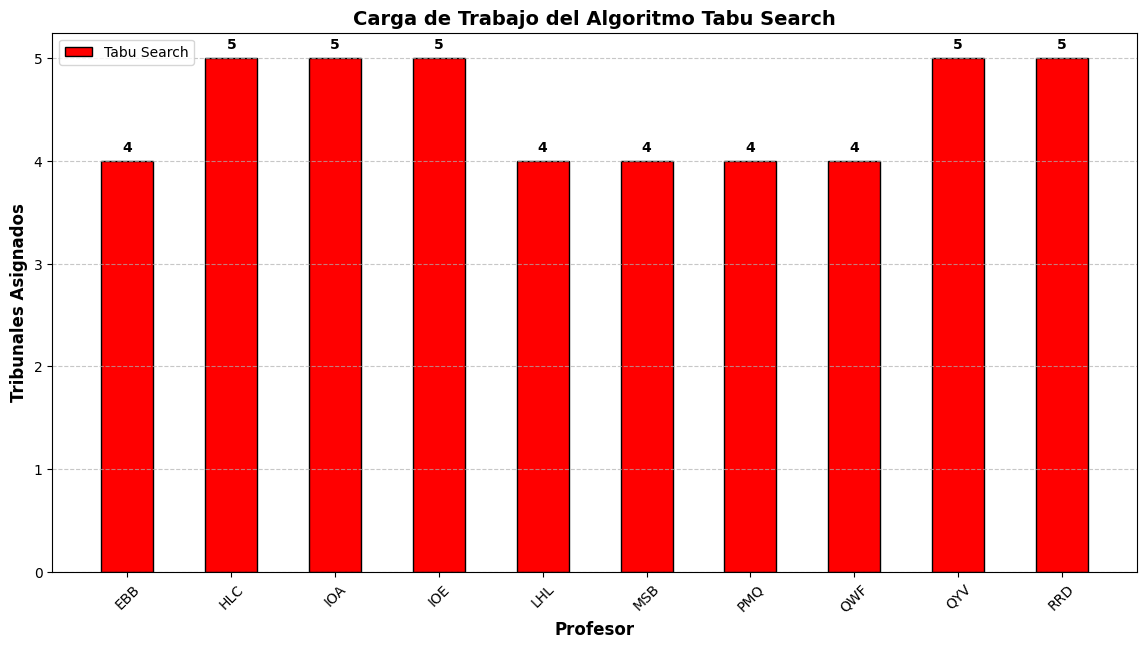

In [42]:
# Visualización de la carga de trabajo del Algoritmo Tabu Search
ts_counts = pd.Series(ts_solution).value_counts().sort_index()

profesores = ts_counts.index
x = np.arange(len(profesores))
width = 0.5

fig, ax = plt.subplots(figsize=(14, 7))
rects = ax.bar(x, ts_counts.values, width, label='Tabu Search', color='red', edgecolor='black')

ax.set_xlabel("Profesor", fontsize=12, fontweight='bold')
ax.set_ylabel("Tribunales Asignados", fontsize=12, fontweight='bold')
ax.set_title("Carga de Trabajo del Algoritmo Tabu Search", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(profesores, rotation=45, fontsize=10)
ax.legend()

# Agregar etiquetas con valores en las barras
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

add_labels(rects)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
df_ts_solution = create_solution_dataframe(ts_solution, "Tabu Search")

# Mostrar solucion
display(df_ts_solution)

,Tribunal,Fecha,Hora,Presidente,Secretario,Vocal
0,1,16,18,HLC,QYV,MSB
1,2,17,18,IOE,QWF,QYV
2,3,19,18,IOE,HLC,EBB
3,4,15,19,RRD,QYV,QWF
4,5,17,16,EBB,HLC,LHL
5,6,16,16,IOA,PMQ,LHL
6,7,18,17,RRD,RRD,EBB
7,8,19,18,EBB,MSB,HLC
8,9,16,20,IOA,QYV,LHL
9,10,17,16,IOA,PMQ,QYV


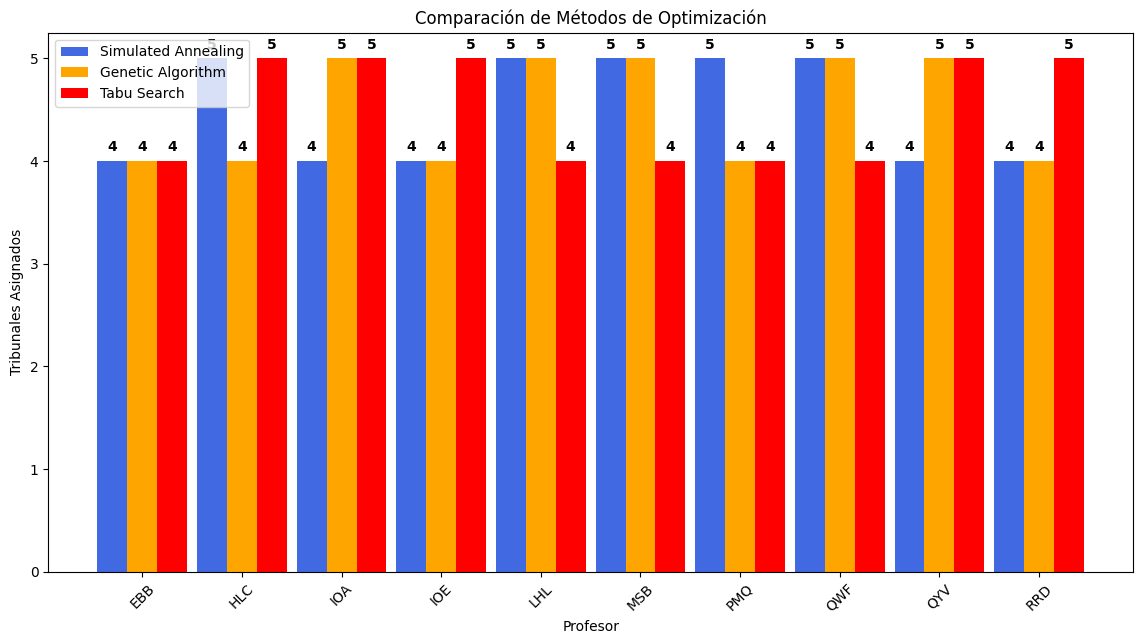

In [44]:
# Comparación de Métodos de Optimización con Gráficos Mejorados
sa_counts = pd.Series(sa_solution).value_counts().sort_index()
ga_counts = pd.Series(ga_solution).value_counts().sort_index()
ts_counts = pd.Series(ts_solution).value_counts().sort_index()

profesores = sa_counts.index
x = np.arange(len(profesores))
width = 0.3

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - width, sa_counts.values, width, label='Simulated Annealing', color='royalblue')
rects2 = ax.bar(x, ga_counts.values, width, label='Genetic Algorithm', color='orange')
rects3 = ax.bar(x + width, ts_counts.values, width, label='Tabu Search', color='red')

ax.set_xlabel("Profesor")
ax.set_ylabel("Tribunales Asignados")
ax.set_title("Comparación de Métodos de Optimización")
ax.set_xticks(x)
ax.set_xticklabels(profesores, rotation=45)
ax.legend()

# Agregar etiquetas con valores en las barras
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.show()

## Conclusión basada en la Comparación de Métodos de Optimización

El gráfico muestra la distribución de tribunales asignados a cada profesor utilizando tres métodos de optimización:  
- Simulated Annealing (Azul)  
- Genetic Algorithm (Naranja)  
- Tabu Search (Rojo)  

A partir del análisis de los resultados, podemos concluir lo siguiente:


### 1. Equidad en la Distribución de la Carga de Trabajo
- Se observa que en general **los tres algoritmos distribuyen los tribunales de manera similar**, con algunos profesores asignados a **5 tribunales** y otros a **4 tribunales**.  
- **Tabu Search y Genetic Algorithm tienden a asignar más tribunales a ciertos profesores** en comparación con Simulated Annealing.  
- La mayoría de los profesores tienen **asignaciones consistentes**, lo que sugiere que los algoritmos están encontrando soluciones balanceadas.  


### 2. Diferencias en las Asignaciones entre los Métodos
- **Tabu Search y Genetic Algorithm muestran una distribución muy similar**, con solo pequeñas diferencias en algunos profesores.  
- **Simulated Annealing tiende a asignar ligeramente menos tribunales a ciertos profesores**, lo que podría indicar una estrategia de búsqueda diferente en la optimización.  
- **El profesor LHL, por ejemplo, muestra una asignación menor en Simulated Annealing**, lo que indica que este algoritmo puede estar favoreciendo una distribución más pareja en algunos casos.  


### 3. Selección del Mejor Método
- **Genetic Algorithm y Tabu Search ofrecen una distribución muy equilibrada**, con una leve tendencia a cargar más a ciertos profesores en comparación con Simulated Annealing.  
- **Simulated Annealing parece generar asignaciones ligeramente más equitativas**, pero con mayor variabilidad en algunos casos.  
- **Para asegurar una distribución justa sin sobrecargar a ciertos profesores, el Algoritmo Genético sigue siendo una opción robusta**, ya que mantiene un equilibrio entre exploración y explotación en la optimización.  


### 4. Conclusión
Dado que el objetivo es distribuir equitativamente la carga entre los profesores sin violar restricciones de disponibilidad, **Genetic Algorithm y Tabu Search presentan resultados muy similares y adecuados para la asignación de tribunales**.  

Si se busca una distribución ligeramente más equitativa, **Simulated Annealing puede ser una opción viable**, aunque con una mayor variabilidad en algunos profesores.  

**En conclusión, el Algoritmo Genético sigue siendo una de las mejores opciones por su estabilidad y balance en la asignación de tribunales.**